In [11]:
import pandas as pd
import requests
import json
from pprint import pprint
from api_keys import nasdaq_key
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import scipy.stats as sp

In [2]:
#get table to see region data
#region code 102001 is for ALL of USA
#region type can change to city/metro/or region code. use metro to get region codes.

table_code = "ZILLOW/REGIONS"
region_type = "metro"
format ="json"
request_url = f"https://data.nasdaq.com/api/v3/datatables/{table_code}.{format}?region_type={region_type}&api_key={nasdaq_key}"
starting_data = requests.get(request_url).json()
pprint(starting_data)

{'datatable': {'columns': [{'name': 'region_id', 'type': 'text'},
                           {'name': 'region_type', 'type': 'text'},
                           {'name': 'region', 'type': 'text'}],
               'data': [['845172', 'metro', 'Winfield, KS; KS'],
                        ['845171', 'metro', 'Union, SC; SC'],
                        ['845170', 'metro', 'Scottsburg, IN; IN'],
                        ['845169', 'metro', 'Rockport, TX; TX'],
                        ['845168', 'metro', 'Pearsall, TX; TX'],
                        ['845167', 'metro', 'Ottawa, IL; IL'],
                        ['845166', 'metro', 'Mount Gay, WV; WV'],
                        ['845165', 'metro', 'Minden, LA; LA'],
                        ['845164', 'metro', 'Lebanon, NH; NH'],
                        ['845163', 'metro', 'Jasper, AL; AL'],
                        ['845162', 'metro', 'Granbury, TX; TX'],
                        ['845161', 'metro', 'Bluffton, IN; IN'],
                        ['845

In [3]:
# Define a list of cities you want to search for
cities = ['New York', 'Los Angeles', 'Miami', 'St. Louis',
          'Seattle', 'Atlanta', 'Houston', 'Minneapolis']

# create an empty dictionary to store the city data frames
city_dfs = {}
df17s = {}
df20s = {}

# loop through each city in the list and search for the city code
for city_name in cities:
    for row in starting_data['datatable']['data']:
        if city_name in row[2]:
            city_code = row[0]
            break

    # use the city code to query the API and retrieve the data
    url = f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id={city_code}&api_key={nasdaq_key}"
    response = requests.get(url)
    city_data = response.json()

    # create a data frame for the city and clean the data
    city_df = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    city_df['date'] = pd.to_datetime(city_df['date'])
    city_df = city_df.sort_values('date')
    
    # drop the columns 'indicator_id' and 'region_id'
    city_df = city_df.drop(['indicator_id', 'region_id'], axis=1)
    
    # create df for 2017-2019
    # create a data frame for the city and clean the data
    df17 = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    df17['date'] = pd.to_datetime(df17['date'])
    df17 = df17.sort_values('date')
    
    # drop the columns 'indicator_id' and 'region_id'
    df17 = df17.drop(['indicator_id', 'region_id'], axis=1)
    
    # create df for 2020-2022
    # create a data frame for the city and clean the data
    df20 = pd.DataFrame(city_data['datatable']['data'], columns=['indicator_id', 'region_id', 'date', 'price'])
    df20['date'] = pd.to_datetime(city_df['date'])
    df20 = df20.sort_values('date')
    
    # drop the columns 'indicator_id' and 'region_id'
    df20 = df20.drop(['indicator_id', 'region_id'], axis=1)

    #create dataframe of cities
    city_dfs[city_name] = city_df
    df17s [city_name] = df17
    df20s [city_name] = df20

#clean data down to data range for samples
for city_name, city_df in city_dfs.items():
    city_dfs[city_name] = city_df[(city_df['date'] >= '2018-01-31') & (city_df['date'] <= '2022-12-31')]
    
for city_name, df17 in df17s.items():
    df17s[city_name] = df17[(df17['date'] >= '2017-01-31') & (df17['date'] <= '2019-12-31')]    
    
for city_name, df20 in df20s.items():
    df20s[city_name] = df20[(df20['date'] >= '2020-01-31') & (df20['date'] <= '2022-12-31')]  



In [4]:
#set vars for dataframes by city name to access them easier for plotting
#New York', 'Los Angeles', 'Miami', 'St. Louis', 'Seattle', 'Atlanta', 'Houston', 'Minneapolis'
new_york = city_dfs["New York"]
los_angeles = city_dfs["Los Angeles"]
miami = city_dfs["Miami"]
stl = city_dfs["St. Louis"]
seattle = city_dfs["Seattle"]
atlanta = city_dfs["Atlanta"]
houston = city_dfs["Houston"]
minneapolis = city_dfs["Minneapolis"]

In [5]:
#set vars for 2017 dataframes by city name to access them easier for plotting
#New York', 'Los Angeles', 'Miami', 'St. Louis', 'Seattle', 'Atlanta', 'Houston', 'Minneapolis'
new_york_17 = df17s["New York"]
los_angeles_17 = df17s["Los Angeles"]
miami_17 = df17s["Miami"]
stl_17 = df17s["St. Louis"]
seattle_17 = df17s["Seattle"]
atlanta_17 = df17s["Atlanta"]
houston_17 = df17s["Houston"]
minneapolis_17 = df17s["Minneapolis"]

In [6]:
#set vars for 2020 dataframes by city name to access them easier for plotting
#New York', 'Los Angeles', 'Miami', 'St. Louis', 'Seattle', 'Atlanta', 'Houston', 'Minneapolis'
new_york_20 = df20s["New York"]
los_angeles_20 = df20s["Los Angeles"]
miami_20 = df20s["Miami"]
stl_20 = df20s["St. Louis"]
seattle_20 = df20s["Seattle"]
atlanta_20 = df20s["Atlanta"]
houston_20 = df20s["Houston"]
minneapolis_20 = df20s["Minneapolis"]

<function matplotlib.pyplot.show(*args, **kw)>

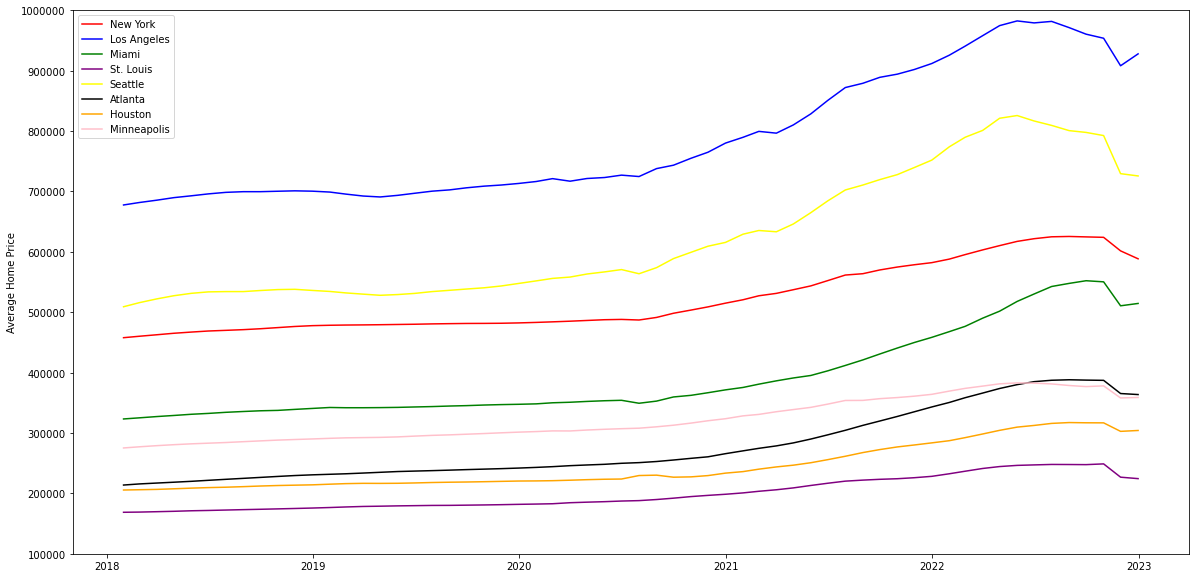

In [16]:
# plots all cities at one time for 2017 - 2022
cities = ['New York', 'Los Angeles', 'Miami', 'St. Louis',
          'Seattle', 'Atlanta', 'Houston', 'Minneapolis']


plt.figure(figsize=(20,10))


plt.plot(city_dfs["New York"]["date"],city_dfs["New York"]["price"],color='red')
plt.plot(city_dfs["Los Angeles"]["date"],city_dfs["Los Angeles"]["price"],color='blue')
plt.plot(city_dfs["Miami"]["date"],city_dfs["Miami"]["price"],color='green')
plt.plot(city_dfs["St. Louis"]["date"],city_dfs["St. Louis"]["price"],color='purple')
plt.plot(city_dfs["Seattle"]["date"],city_dfs["Seattle"]["price"],color='yellow')
plt.plot(city_dfs["Atlanta"]["date"],city_dfs["Atlanta"]["price"],color='black')
plt.plot(city_dfs["Houston"]["date"],city_dfs["Houston"]["price"],color='orange')
plt.plot(city_dfs["Minneapolis"]["date"],city_dfs["Minneapolis"]["price"],color='pink')

plt.legend(cities)

plt.xticks(rotation=0)


plt.ylim([100000 , 1000000])
plt.ticklabel_format(style='plain', useOffset=False, axis='y')


plt.ylabel("Average Home Price")
#plt.title(f'{city} Metro Area')
plt.show

2017-2019: slope = 610.4020592020591
2020-2022: slope = 2059.4551614491374


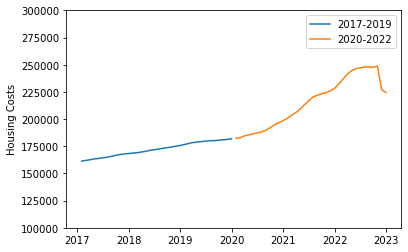

In [17]:
# calculate linear regression 2017-2019
y = np.array(df17s['St. Louis']['price'].values, dtype=float)
x = np.array(range(0,36), dtype=float)
slope1, intercept, r_value, p_value, std_err = sp.linregress(x,y)


# calculate linerar regression 2020-2022
y = np.array(df20s['St. Louis']['price'].values, dtype=float)
x = np.array(range(0,36), dtype=float)
slope2, intercept, r_value, p_value, std_err = sp.linregress(x,y)


             
# Create a figure and axis object
fig, ax = plt.subplots()



# Set the y-axis label
ax.set_ylabel('Housing Costs')
# Plot the data for 2018-2020 on one line
data1 = df17s["St. Louis"]['price']
ax.plot(df17s["St. Louis"]['date'], data1, label='2017-2019')
# Plot the data for 2021-2023 on another line
data2 = df20s["St. Louis"]['price']
ax.plot(df20s["St. Louis"]['date'], data2, label='2020-2022')
# Add a legend to the plot
ax.legend()


plt.ylim([100000 , 300000])

print(f'2017-2019: slope = {slope1}')
print(f'2020-2022: slope = {slope2}')

# Show the plot
plt.show()

In [18]:
# function to plot all cities individually at the same time
def plotter():
    
    for city in cities:
        # calculate linear regression 2017-2019
        y = np.array(df17s[city]['price'].values, dtype=float)
        x = np.array(range(0,36), dtype=float)
        slope1, intercept, r_value, p_value, std_err = sp.linregress(x,y)


        # calculate linerar regression 2020-2022
        y = np.array(df20s[city]['price'].values, dtype=float)
        x = np.array(range(0,36), dtype=float)
        slope2, intercept, r_value, p_value, std_err = sp.linregress(x,y)



        # Create a figure and axis object
        fig, ax = plt.subplots()



        # Set the y-axis label
        ax.set_ylabel('Housing Costs')
        # Plot the data for 2018-2020 on one line
        data1 = df17s[city]['price']
        ax.plot(df17s[city]['date'], data1, label='2017-2019')
        # Plot the data for 2021-2023 on another line
        data2 = df20s[city]['price']
        ax.plot(df20s[city]['date'], data2, label='2020-2022')
        # Add a legend to the plot
        ax.legend()
        # add city name to plot title
        plt.title(f'{city}')


        #plt.ylim([ylim1 , ylim2])
        ax = plt.gca()

        # recompute the ax.dataLim
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()
        plt.draw()

        

        print(f'{city} 2017-2019: slope = {slope1}')
        print(f'{city} 2020-2022: slope = {slope2}')
       

        # Show the plot
        plt.show()
        
        print('---------------------------------------------------------------------------------')

New York 2017-2019: slope = 1485.2142857142858
New York 2020-2022: slope = 4698.180518946601


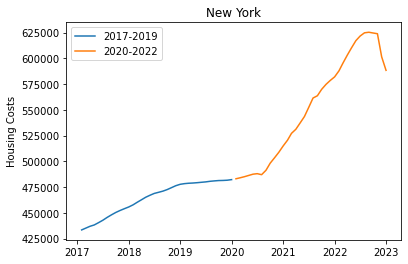

---------------------------------------------------------------------------------
Los Angeles 2017-2019: slope = 2081.4166023166026
Los Angeles 2020-2022: slope = 8721.254914383915


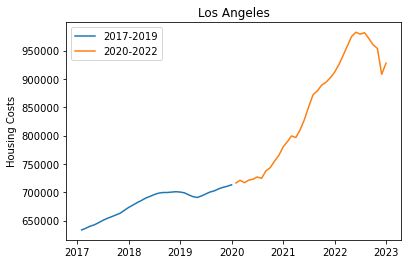

---------------------------------------------------------------------------------
Miami 2017-2019: slope = 1277.0451737451738
Miami 2020-2022: slope = 6517.767655426075


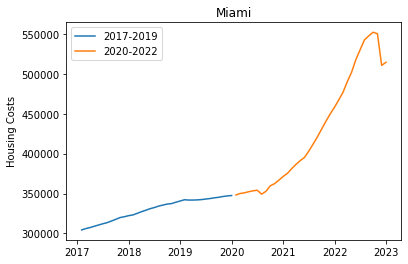

---------------------------------------------------------------------------------
St. Louis 2017-2019: slope = 610.4020592020591
St. Louis 2020-2022: slope = 2059.4551614491374


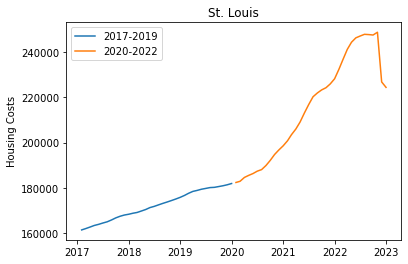

---------------------------------------------------------------------------------
Seattle 2017-2019: slope = 2519.505405405406
Seattle 2020-2022: slope = 8408.451188971154


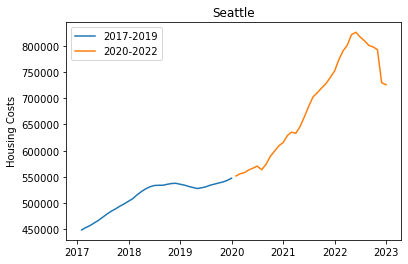

---------------------------------------------------------------------------------
Atlanta 2017-2019: slope = 1384.3447876447879
Atlanta 2020-2022: slope = 4921.638418167936


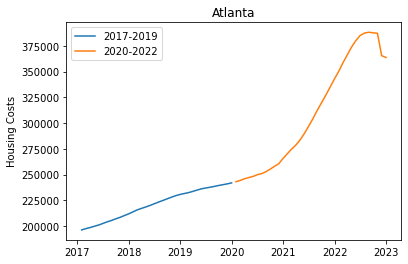

---------------------------------------------------------------------------------
Houston 2017-2019: slope = 642.7184041184042
Houston 2020-2022: slope = 3259.7598155931396


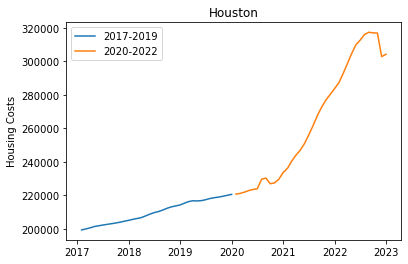

---------------------------------------------------------------------------------
Minneapolis 2017-2019: slope = 1248.9532818532823
Minneapolis 2020-2022: slope = 2564.6863573077003


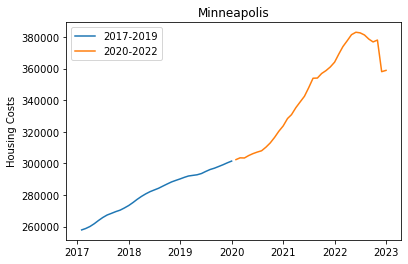

---------------------------------------------------------------------------------


In [19]:
plotter()

In [20]:
# create empty lists for slopes for a city in each timeframe
slope17_19 = []
slope20_22 = []
    
for city in cities:

    # calculate linear regression 2017-2019
    y = np.array(df17s[city]['price'].values, dtype=float)
    x = np.array(range(0,36), dtype=float)
    slope1, intercept, r_value, p_value, std_err = sp.linregress(x,y)


    # calculate linerar regression 2020-2022
    y = np.array(df20s[city]['price'].values, dtype=float)
    x = np.array(range(0,36), dtype=float)
    slope2, intercept, r_value, p_value, std_err = sp.linregress(x,y)
    
    slope17_19.append(slope1)
    slope20_22.append(slope2)

In [36]:
# create price_change dataframe to store slope values 
price_change = pd.DataFrame({'City':cities,
                            'Rate of price change 2017-2019 (dollars/month)':slope17_19,
                             'Rate of price change 2020-2022 (dollars/month)':slope20_22
})

# calculates percent change of rates of price change
percent_change = round(((price_change["Rate of price change 2020-2022 (dollars/month)"] - price_change['Rate of price change 2017-2019 (dollars/month)'])/(price_change['Rate of price change 2017-2019 (dollars/month)']))*100,0)

price_change['Percent Change'] = percent_change

price_change.set_index('City', inplace = True)

price_change = price_change.round(decimals=2)
price_change

,Rate of price change 2017-2019 (dollars/month),Rate of price change 2020-2022 (dollars/month),Percent Change
City,,,
New York,1485.21,4698.18,216.0
Los Angeles,2081.42,8721.25,319.0
Miami,1277.05,6517.77,410.0
St. Louis,610.40,2059.46,237.0
Seattle,2519.51,8408.45,234.0
Atlanta,1384.34,4921.64,256.0
Houston,642.72,3259.76,407.0
Minneapolis,1248.95,2564.69,105.0


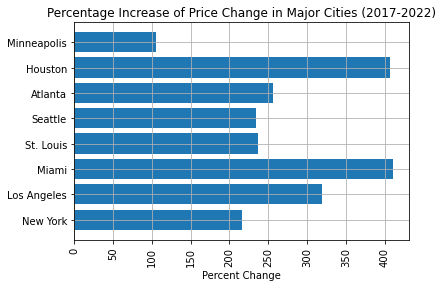

In [38]:
plt.barh(price_change.index, price_change['Percent Change'])

plt.title('Percentage Increase of Price Change in Major Cities (2017-2022)')
plt.xlabel('Percent Change')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

fig = plt.gcf()

plt.grid()
plt.show()